# **Predictive Analytics**

Nama: Joko prabowo <br>
ID: jprabowo <br>
Email: jokoprabowo4550@gmail.com <br>

## **Data loading**
---
Proses dalam menyimpan dan memuat data untuk diproses lebih lanjut

In [69]:
import pandas as pd

url = 'https://github.com/jokoprabowo/predictive_analytics_for_water_quallity_prediction/releases/download/dataset/diabetes.csv'
df = pd.read_csv(url)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Exploratory data analysis**
---
 Proses untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

### Deskripsi variabel
---
Proses untuk mendeskripsikan setiap variabel agar variabel tersebut dapat dimengerti secara umum


Berdasarkan informasi dari kaggle, variable-variable diatas dapat diartikan:

Variabel|Keterangan
---|---
Pregnancies|Jumlah kehamilan
Glucose|Kadar glukosa dalam darah
BloodPressure|Tekanan darah
SkinThickness|Ketebalan kulit
Insulin|Kadar insulin dalam tubuh
BMI|Index massa tubuh
DiabetesPedigreeFunction|Presentase diabetes
Age|Umur
Outcome|Nilai akhir (positif = 1) dan (negatif = 0)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Dari hasil diatas dapat dilihat bahwa:
*   Terdapat 6 data numerik dengan tipe data int64, yaitu: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, dan Age
*   Terdapat 2 data numerik dengan tipe data float64, yaitu: BMI, dan DiabetesPedigreeFunction
*   Terdapat 1 data kategorik dengan tipe data int64, yaitu: Outcome yang merupakan target fitur dari proyek ini.



In [71]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Data diatas memperlihatkan informasi statistik pada setiap kolom yaitu:

Variabel|Keterangan
---|---
count|jumlah sampel
mean|nilai rata-rata
std|standar deviasi
min|nilai minimum
25%|kuartil pertama
50%|kuartil kedua
75%|kuartil ketiga
max|nilai maximum


### Unvariate analysis
---
Proses untuk menganalisis data terhadap satu variabel secara mandiri

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Bagi fitur menjadi numerical dan categorical features berdasarkan data diatas, dan lakukan proses analisis pada setiap fiturnya

In [73]:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
categorical_features = ['Outcome']

         jumlah sampel  persentase
Outcome                           
0                  500        65.1
1                  268        34.9


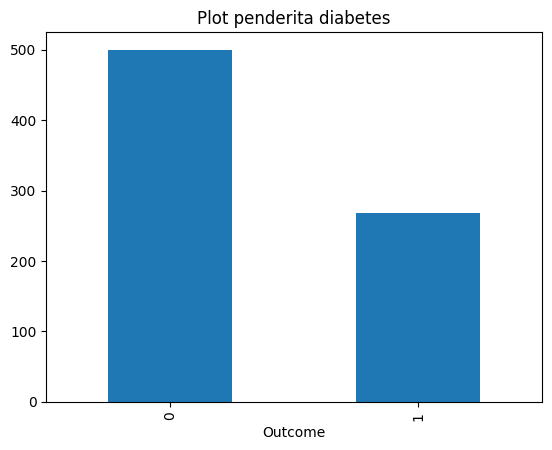

In [74]:
# Fitur outcome
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_outcome = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_outcome)
count.plot(kind='bar', title='Plot penderita diabetes');

Berdasarkan gambar diatas, dapat disimpulkan bahwa mayoritas responden bukan merupakan penderita diabetes (Outcome = 0)

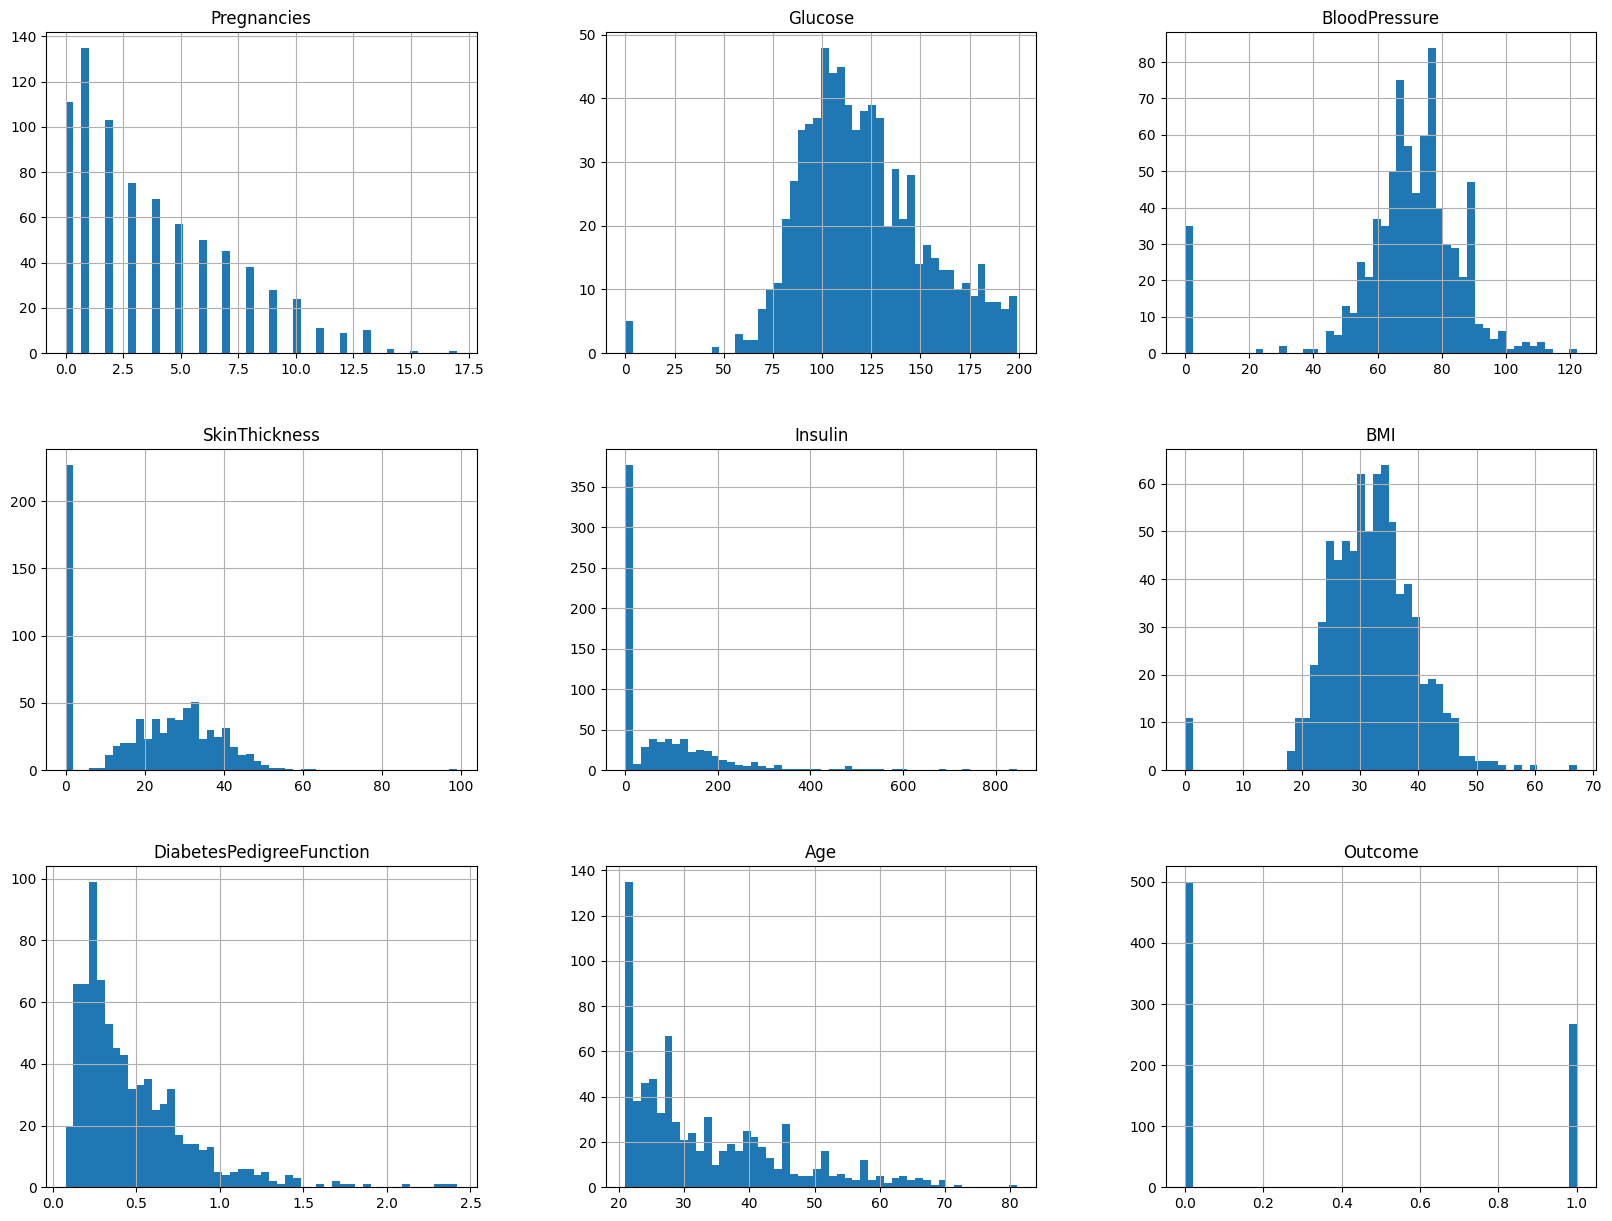

In [75]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Berdasarkan histogram diatas dapat disimpulkan bahwa:
*   Plot histogram SkinThickness dan Insulin tidak berdistribusi normal
*   Plot histogram dari Glucose, BloodPressure, dan BMI cukup berdistribusi normal
*   Plot histogram dari Pregnancies, DiabetesPedigreeFunction, dan Age berdistribusi cenderung miring ke kanan sehingga mayoritas data memiliki nilai dibawah rata-rata


### Multivariate analysis
---
Proses yang digunakan untuk menganalisis hubungan antara dua variabel atau lebih

Untuk menganalisis hubungan antara fitur target (Outcome) dengan fitur lainnya pada proyek ini, fungsi stripplot() akan digunakan sebagai visualisasi hubungannya

In [76]:
df_features = df.columns.tolist()
df_features.remove('Outcome')

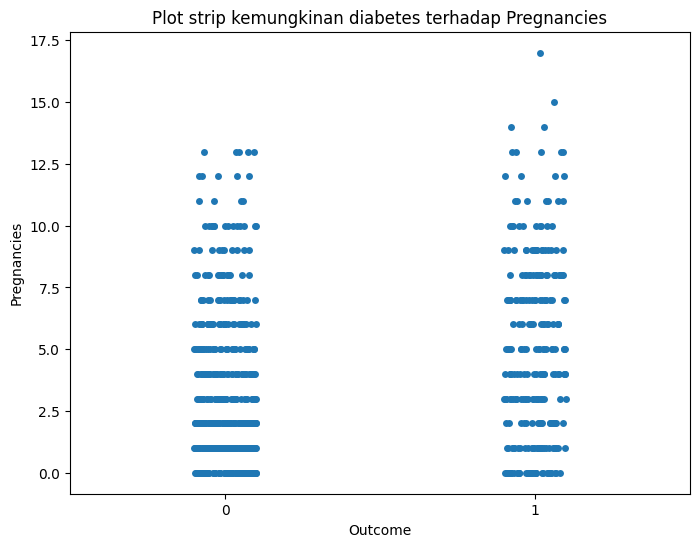

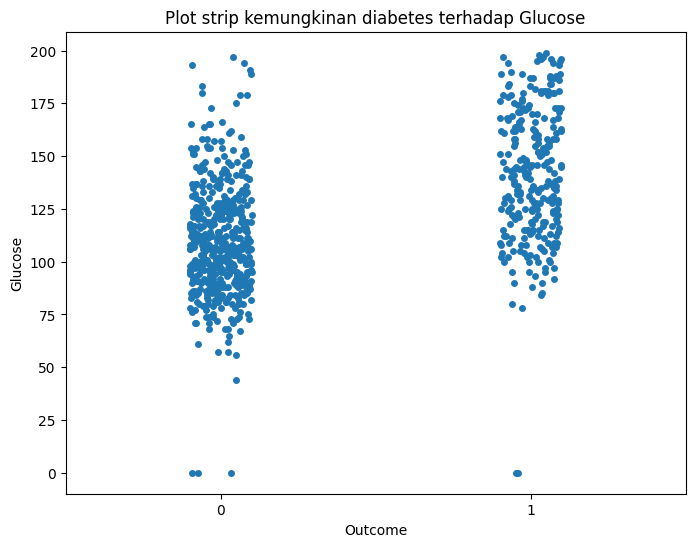

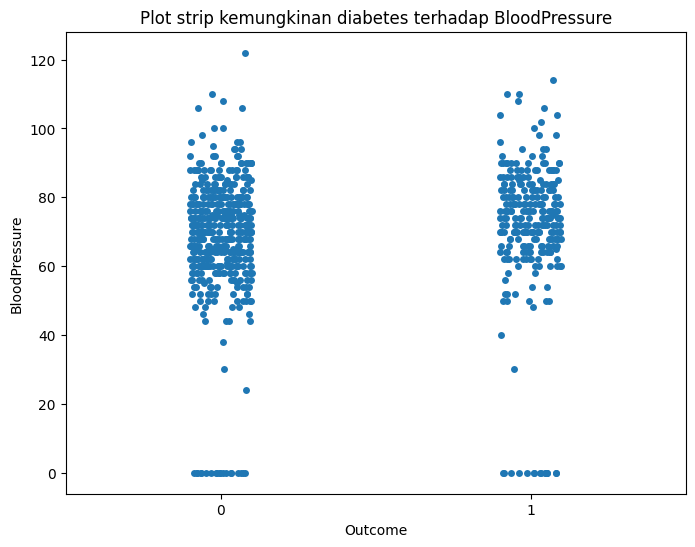

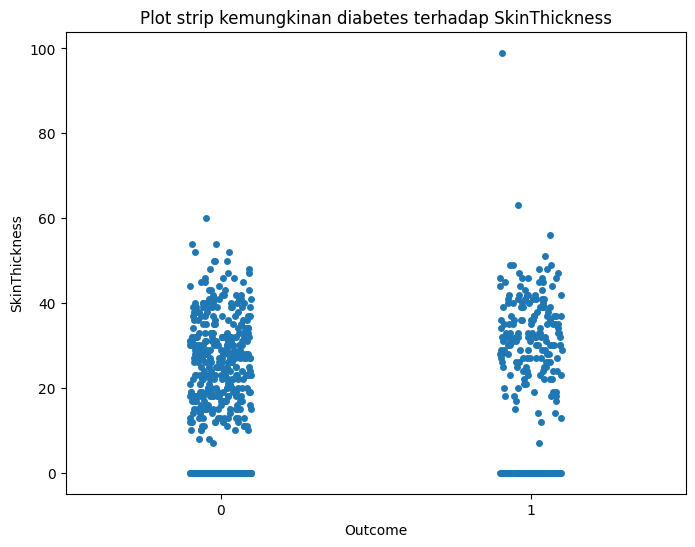

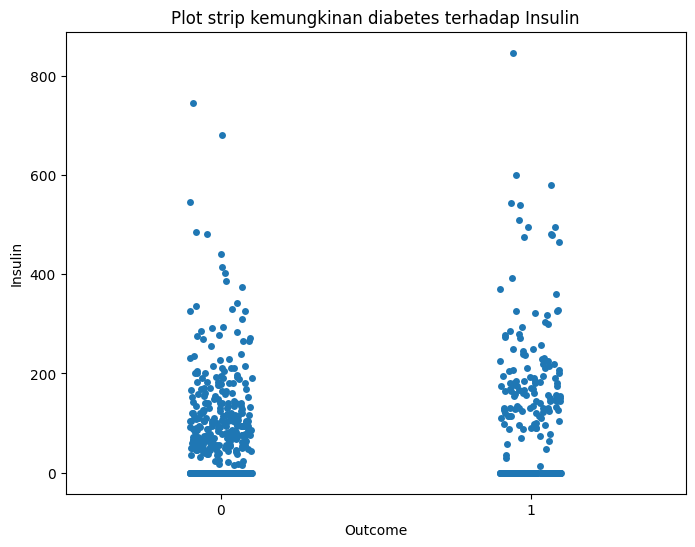

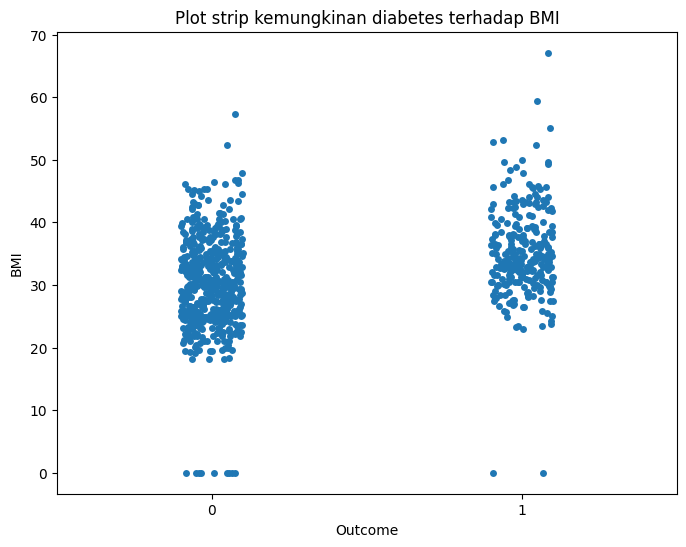

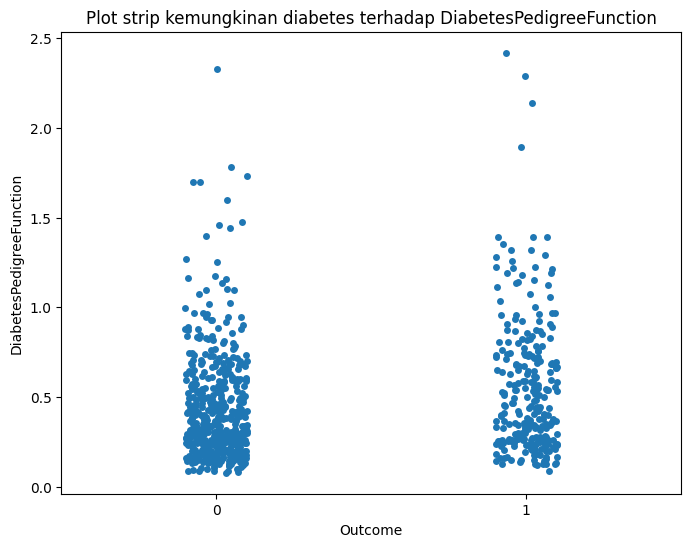

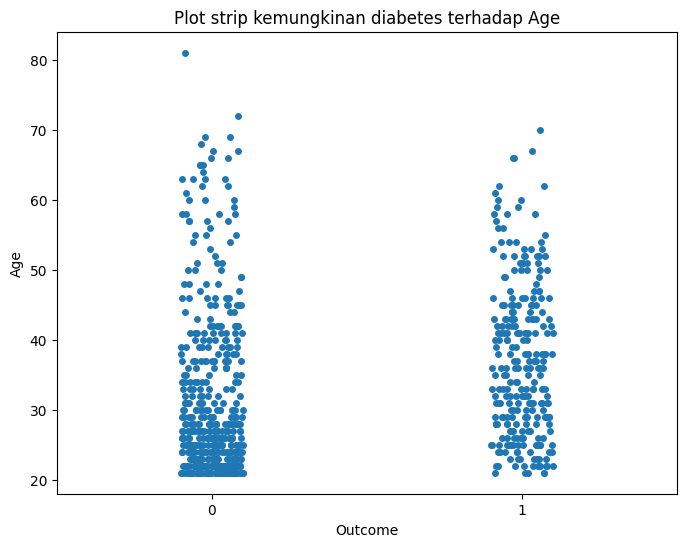

In [77]:
# Membuat plot strip perbandingan untuk setiap fitur
import matplotlib.pyplot as plt
import seaborn as sns

for column in df_features:
  plt.figure(figsize = (8, 6))
  sns.stripplot(data = df, x = "Outcome", y = column)
  plt.title(f'Plot strip kemungkinan diabetes terhadap {column}')
  plt.xlabel('Outcome')
  plt.ylabel(f'{column}')
  plt.show()

Berdasarkan visualisasi dari gambar-gambar diatas dapat disimpulkan bahwa:
*   Tidak terdapat perbedaan yang mencolok antara fitur-fitur diatas dengan kemungkinan menderita diabetes
*   Namun, dalam rentang kandungan glukosa di dalam tubuh orang pengidap diabetes berkisar 80 - 200 mg/dL namun berkisar 40 - 180 mg/dL untuk yang bukan pengidap diabetes





Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

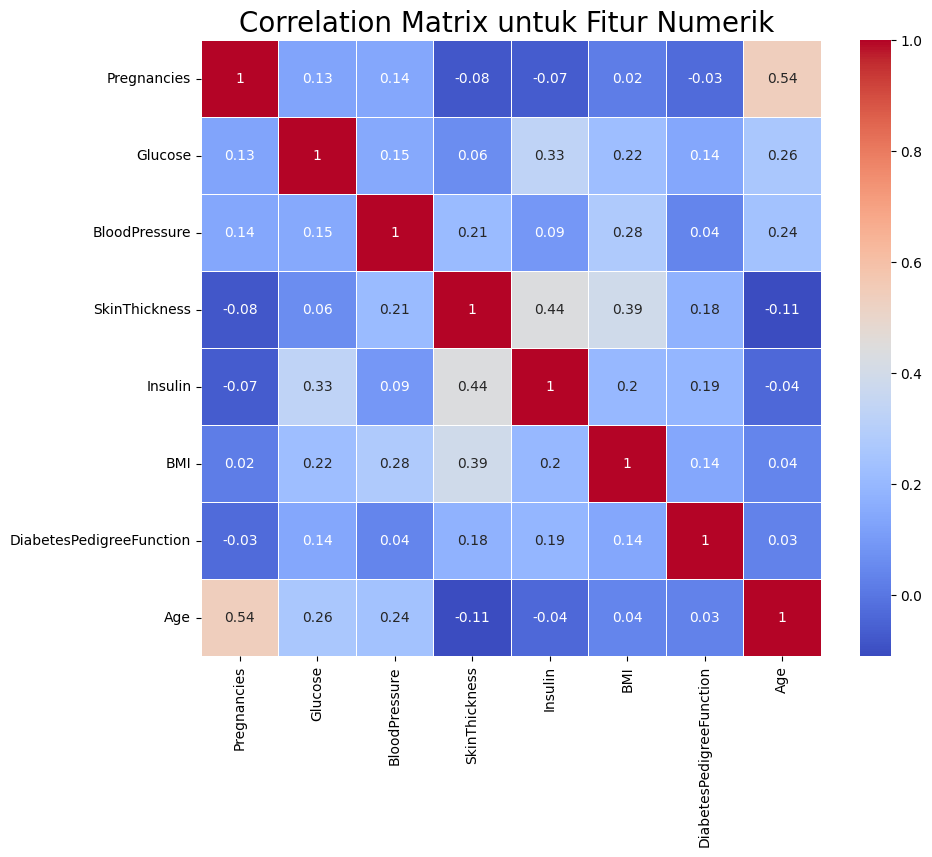

In [78]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Dari heatmap diatas dapat terlihat bahwa:
*   Umur punya korelasi yang cukup tinggi terhadap jumlah kehamilan, layaknya kadar insulin dalam tubuh terhadap ketebalan kulit
*   Namun Umur punya korelasi yang sangat rendah terhadap kadar insulin dalam tubuh, layaknya jumlah kehamilan terhadap ketebalan kulit



## **Data preparation**
---
Proses untuk menyiapkan data mentah agar dapat diproses dan dianalisis lebih lanjut.

### Menangani missing value dan outliners
---
Proses untuk menghapus kolom yang bernilai kosong (NaN) serta terduplikat, untuk mengatasi data ganda dan data yang tidak lengkap

In [79]:
# menampilkan total data kosong
df.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Berdasarkan hasil diatas, tidak ada data kosong dalam dataset ini

Kemudian lakukan cek terhadap data terduplikasi

In [80]:
df.duplicated().sum()

0

Keterangan diatas menyatakan bahwa tidak ada data yang terduplikasi

In [81]:
df_features = df.columns.tolist()
df_features.remove('Outcome')

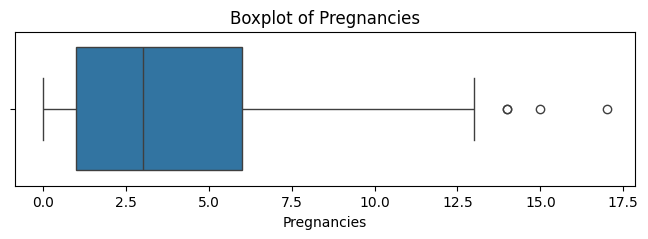

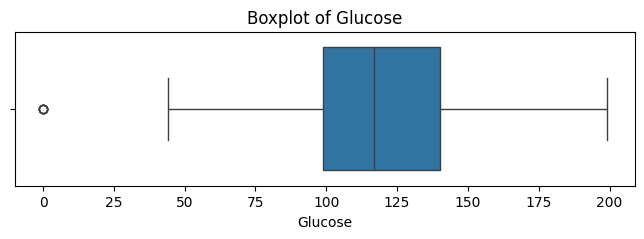

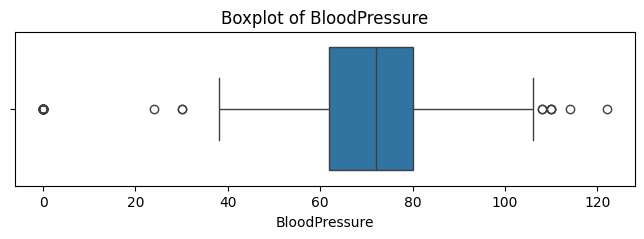

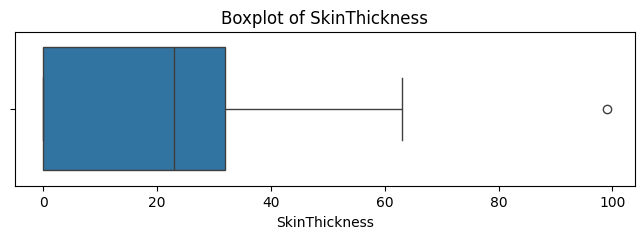

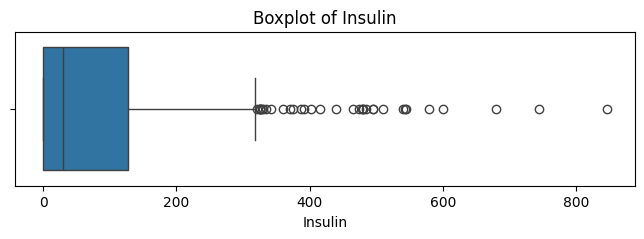

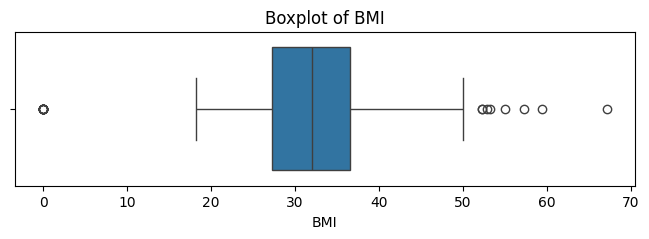

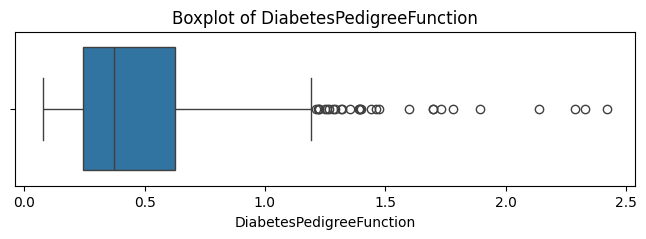

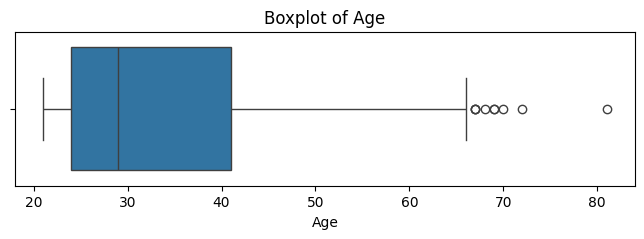

In [82]:
for column in df_features:
  plt.figure(figsize=(8,2))
  sns.boxplot(x=df[column])
  plt.title(f'Boxplot of {column}')
  plt.show()

Gambar diatas merupakan visualisasi data untuk mendeteksi outliners pada setiap fitur numerik, kemudian outliners tersebut akan diatasi menggunakan metode IQR

In [83]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape, df_out.shape

((768, 9), (639, 9))

Hasil diatas merupakan total data sebelum dan sesudah menangani data outliner

### Train-Test-Split
---
Proses ini dilakukan untuk membagi data menjadi data latih(train), dan data uji(test) yang digunakan untuk membuat model

Sebelum membuat data training dan test, data perlu dipisahkan antara fitur komposisi dan fitur target

In [84]:
from sklearn.model_selection import train_test_split

X = df_out[df_features]
y = df_out['Outcome']

# Komposisi data train dan data test adalah 80% dan 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [85]:
print("Ukuran X_train: ", X_train.shape)
print("Ukuran X_test: ", X_test.shape)
print("Ukuran y_train: ", y_train.shape)
print("Ukuran y_test: ", y_test.shape)

Ukuran X_train:  (511, 8)
Ukuran X_test:  (128, 8)
Ukuran y_train:  (511,)
Ukuran y_test:  (128,)


### Standarisasi
---
Proses ini digunakan untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma

Proses ini akan menggunakan fungsi standardScaler yang akan mengurangi nilai rata-rata dan kemudian membaginya dengan standar deviasi. Fungsi ini akan menghasilkan nilai rata-rata 0 dan standar deviasi 1

In [86]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
722,-0.879418,1.004207,-0.393266,0.539350,0.733503,-0.428419,-0.323523,0.804214
213,-1.185954,0.694708,-0.656646,0.344528,0.770607,1.616003,0.003544,-0.803165
343,0.346728,0.075709,1.187015,-1.343926,-0.837214,0.401647,-0.558851,0.000524
306,1.879411,1.416873,-0.393266,0.149706,0.795343,-1.012540,-0.415261,1.250708
304,-0.266345,1.038596,0.309081,-1.343926,-0.837214,-1.704262,-0.889906,0.357720


In [87]:
X_train[numerical_features].describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,511.000,511.000,511.000,511.000,511.000,511.000,511.000,511.000
mean,-0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001,1.001,1.001,1.001
min,-1.186,-2.607,-3.027,-1.344,-0.837,-2.135,-1.404,-1.071
25%,-0.879,-0.715,-0.744,-1.344,-0.837,-0.736,-0.766,-0.803
50%,-0.266,-0.165,-0.042,0.150,-0.343,-0.013,-0.272,-0.357
75%,0.653,0.626,0.660,0.734,0.709,0.632,0.626,0.626
max,2.799,2.689,2.943,2.163,3.096,2.754,3.027,2.947


Seperti yang terlihat pada data diatas, setelah melewati proses standarisasi nilai mean menyentuh 0 dan standar deviasi 1, sehingga proses selanjutnya akan menjadi lebih mudah

## **Model development**
---
Proses sistematis dalam membuat model untuk menyelesaikan masalah.

Dalam proyek ini, model yang akan digunakan yaitu:
*   K-Nearest Neighbour
*   Random Forest
*   Adaptive Boosting
*   Support Vector Machine
*   Decision Tree



Implementasikan model:

---
<br>
Model K-Nearest Neighbour(KNN)<br>
Algoritme KNN bekerja dengan menemukan K tetangga terdekat ke titik data tertentu berdasarkan metrik jarak, seperti jarak Euclidean. Kelas atau nilai titik data kemudian ditentukan oleh suara mayoritas atau rata-rata K tetangga. Pendekatan ini memungkinkan algoritme untuk beradaptasi dengan pola yang berbeda dan membuat prediksi berdasarkan struktur lokal data.

In [88]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

knn = KNeighborsClassifier(n_neighbors=25, p=2, leaf_size=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(leaf_size=10, n_neighbors=25)

Parameter yang digunakan dalam model KNN diantaranya:
*   n_neighbors = 25 (Jumlah tetangga)
*   p = 2 (Kekuatan parameter untuk metrik minkowski, pada model ini digunakan minkowski_distance (l_p))
*   leaf_size = 10 (Ukuran daun yang akan diteruskan ke BallTree atau KDTree)
---




Model Random Forrest<br>
Random Forest bekerja dengan membangun beberapa decision tree dan menggabungkannya demi mendapatkan prediksi yang lebih stabil dan akurat. ‘Hutan’ yang dibangun oleh Random Forest adalah kumpulan decision tree di mana biasanya dilatih dengan metode bagging. Ide umum dari metode bagging adalah kombinasi model pembelajaran untuk meningkatkan hasil keseluruhan

In [89]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)

Parameter yang digunakan dalm model Random Forest diantaranya:
*   n_estimators = 200 (Jumlah pohon di dalam hutan)
*   max_depth = 8 (Total kedalaman pohon)
*   random_state = 42 (Jumlah sampel acak)
---



Model Adaptive Boosting<br>
AdaBoost awalnya memberikan bobot yang sama untuk setiap set data. Kemudian, secara otomatis menyesuaikan bobot titik data setelah setiap pohon keputusan. AdaBoost memberikan bobot lebih pada item dengan klasifikasi yang salah agar diperbaiki di putaran berikutnya. AdaBoost mengulangi proses tersebut hingga kesalahan yang tersisa, atau selisih antara nilai aktual dan prediksi, jatuh di bawah ambang batas yang dapat diterima.

In [90]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(n_estimators=100,learning_rate=0.1, random_state=42)
boosting.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.1, n_estimators=100, random_state=42)

Parameter yang digunakan dalm model Adaptive Boosting diantaranya:
*   n_estimators = 100 (Jumlah penaksir dimana peningkatan dihentikan)
*   learning_rate = 0.1 (Kecepatan pembelajaran)
*   random_state = 42 (Jumlah sampel acak)
---

Model Support Vector Machine<br>
SVM bekerja dengan memetakan data ke ruang fitur berdimensi tinggi sehingga titik data dapat dikategorikan, bahkan ketika data tidak dapat dipisahkan secara linier. Ditemukan pemisah antar kategori, kemudian data ditransformasikan sedemikian rupa sehingga pemisah tersebut dapat digambarkan sebagai hyperplane. Setelah itu, karakteristik data baru dapat digunakan untuk memprediksi kelompok mana yang seharusnya menjadi bagian dari data baru.

In [91]:
from sklearn.svm import SVC

svm = SVC(gamma = 'scale', C=10, kernel='linear')
svm.fit(X_train, y_train)

SVC(C=10, kernel='linear')

Parameter yang digunakan dalm model Support Vector Machine diantaranya:
*   gamma = scale (koefisien kernel yang digunakan = 1/jumlah fitur)
*   C = 10 (Parameter regularisasi)
*   kernel= linear (Menentukan tipe kernel yang akan digunakan dalam algoritma)
---

Model Decission Tree<br>
Untuk memprediksi kelas dari dataset yang diberikan, algoritma Decision tree dimulai dari simpul akar pohon. Algoritma ini membandingkan nilai atribut root dengan atribut record. Berdasarkan perbandingan tersebut, algoritma menelusuri cabang dan menuju ke simpul berikutnya. Untuk simpul berikutnya, algoritma kembali membandingkan nilai atribut dengan sub-simpul lainnya dan bergerak menuju simpul yang lebih dalam. Tujuannya untuk melanjutkan proses sampai mencapai simpul daun (node leaf).

In [92]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(min_samples_leaf = 1, min_samples_split = 2, max_depth = 1, max_features = 4, random_state = 42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1, max_features=4, random_state=42)

Parameter yang digunakan dalam model Decision Tree diantaranya:
*   min_sample_leaf = 10 (Jumlah minimum sampel yang diperlukan untuk berada pada simpul daun)
*   min_samples_split = 2 (Jumlah minimum sampel yang diperlukan untuk memisahkan node internal)
*   max_depth = 8 (Kedalaman maksimum dari pohon)
*   max_features = 1 (Jumlah fitur yang perlu dipertimbangkan saat mencari pemisahan terbaik)
*   random_state = 42 (Jumlah sampel acak)
---

## **Evaluasi model**
---
Proses untuk mengevaluasi hasil prediksi dari model yang telah dibuat.

Metrik yang digunakan dalam proses evaluasi ini yaitu:
*   Akurasi (Accuracy) merupakan proporsi data yang berhasil diprediksi dengan benar dari seluruh data yang diprediksi.
*   Presisi (Precision) merupakan proporsi data positif yang berhasil diprediksi dengan benar dari seluruh data yang diprediksi positif.
*   Sensitivitas (Recall) merupakan proporsi data positif yang berhasil diprediksi dengan benar dari seluruh data yang aslinya positif.
*   skor f1 (F1 Score) merupakan rata-rata harmonik dari precision dan recall untuk mendapatkan sebuah metrik yang seimbang.


<br>
 Namun sebelum melakukan evaluasi, perlu dilakukan scaling pada fitur numerik dalam data uji seperti halnya yang telah dilakukan pada data latih sebelumnya. Hal ini dilakukan agar skala nilai antar keduanya serupa.

In [93]:
# Melakukan scaling pada fitur numerik dalam data uji
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

<ipython-input-93-6687f1d22932>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.26634486 -0.26634486  1.26633784 -0.26634486 -0.87941794  0.65326476
 -0.26634486 -0.5728814  -0.87941794  0.04019168  0.9598013   0.34672822
 -0.87941794  0.04019168  2.79902055 -0.26634486 -0.5728814  -0.87941794
  1.26633784  0.04019168 -1.18595449  0.04019168 -0.5728814  -0.87941794
  1.57287439 -0.87941794 -1.18595449 -1.18595449  0.65326476 -1.18595449
 -0.26634486 -0.5728814  -0.5728814   0.04019168 -0.26634486 -0.26634486
  1.26633784  1.57287439 -0.5728814  -0.87941794 -0.26634486  0.34672822
  0.04019168 -0.5728814  -0.5728814  -0.87941794 -1.18595449  0.9598013
  0.9598013  -0.5728814   1.87941093  1.57287439 -0.87941794 -1.18595449
 -0.87941794  2.49248401 -0.87941794  0.04019168 -0.5728814  -0.26634486
  0.65326476 -1.18595449  0.9598013  -0.87941794  0.9598013  -0.5728814
  0.9598013  -0.87941794 -1.18595449 -1.185954

In [94]:
# Melakukan evaluasi pada setiap model yang telah dibuat
models = pd.DataFrame(index=['KNN', 'RandomForest', 'Boosting', 'SVM', 'DecisionTree'],
                      columns=['Accuracy', 'Precision', 'Recall', 'F1-score', 'Support'])

model_dict = {'KNN': knn, 'RandomForest': rf, 'Boosting': boosting, 'SVM': svm, 'DecisionTree': dtree}

for name, model in model_dict.items():
    models.loc[name, 'Accuracy'] = accuracy_score(y_true=y_test, y_pred=model.predict(X_test))
    models.loc[name, 'Precision'] = precision_score(y_true=y_test, y_pred=model.predict(X_test))
    models.loc[name, 'Recall'] = recall_score(y_true=y_test, y_pred=model.predict(X_test))
    models.loc[name, 'F1-score'] = f1_score(y_true=y_test, y_pred=model.predict(X_test))
    models.loc[name, 'Support'] = y_test.shape[0]

models

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Accuracy,Precision,Recall,F1-score,Support
KNN,0.796875,0.75,0.416667,0.535714,128
RandomForest,0.804688,0.689655,0.555556,0.615385,128
Boosting,0.84375,0.863636,0.527778,0.655172,128
SVM,0.804688,0.761905,0.444444,0.561404,128
DecisionTree,0.71875,0.0,0.0,0.0,128


Visualisasikan akurasi ke dalam bar chart

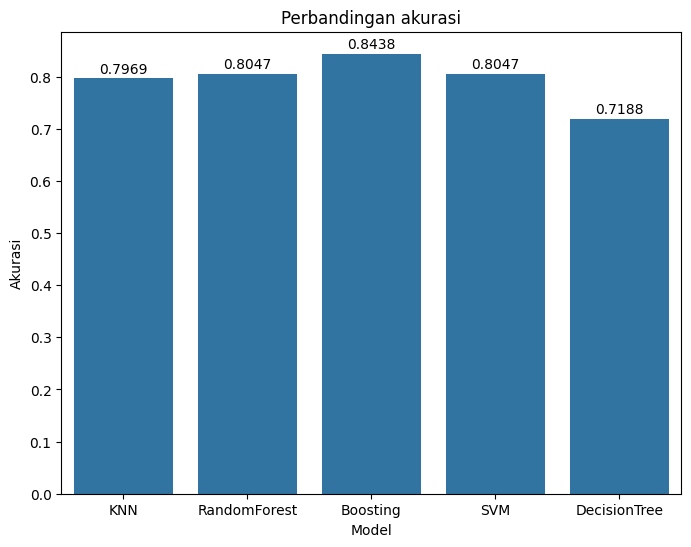

In [95]:
plt.figure(figsize = (8, 6))
barplot = sns.barplot(data = models, x = models.index, y = 'Accuracy')

for index, value in enumerate(models['Accuracy']):
    barplot.text(index, value + 0.01, f"{value:.4f}", color = 'black', ha = 'center')

plt.title('Perbandingan akurasi')
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.show()

Berdasarkan tabel dan gambar diatas, setiap model menghasilkan skor metrik yang bervariasi. Namun jika diperhatikan lebih detail, hasil skor metrik dari setiap model tidak terpaut terlalu jauh. Dan dari gambar di atas dapat diambil kesimpulan bahwa model yang menghasilkan skor akurasi terendah adalah model Decision Tree dengan akurasi 71.88% dan skor akurasi tertinggi adalah model Adaptive Boosting dengan akurasi 84.38%